## SVM

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

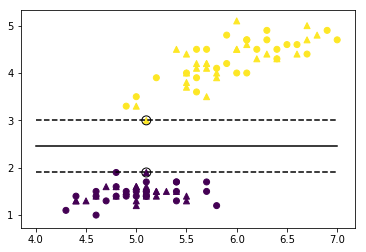

In [2]:
df = pd.read_csv('C:/Users/NewSense/Documents/Iris.csv')

rows = list(range(100, 150))
df = df.drop(df.index[rows])
dfp = df.copy()

rows = list(range(1, 25))
df = df.drop(df.index[rows])
rows = list(range(25, 50))
df = df.drop(df.index[rows])

rows = list(range(25, 50))
dfp = dfp.drop(dfp.index[rows])
rows = list(range(50, 75))
dfp = dfp.drop(dfp.index[rows])

X = np.column_stack((df['SepalLengthCm'], df['PetalLengthCm']))
y = df['Species']

clf = svm.SVC(kernel = 'linear', C = 2.0)
clf.fit(X, y)

m = {'Iris-setosa': 0,'Iris-versicolor': 1}
y = [m[item] for item in y]

plt.scatter(X[:, 0], X[:, 1], c = y, marker = '^')

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 7)
yy = a * xx - clf.intercept_[0] / w[1]

margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 80, facecolors = 'none', edgecolors = 'k')

Xp = np.column_stack((dfp['SepalLengthCm'], dfp['PetalLengthCm']))
y = clf.predict(Xp)

m = {'Iris-setosa': 0,'Iris-versicolor': 1}
y = [m[item] for item in y]

plt.scatter(Xp[:, 0], Xp[:, 1], c = y, marker = 'o')

plt.show()

## Neural Networks

In [3]:
import numpy as np

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x) :
    return x * (1 - x)

X = np.array([[1, 0, 1, 0],
              [1, 0, 1, 1],
              [0, 1, 0, 1]])

y = np.array([[1], [1], [0]])

epoch = 5000
lr = 0.1

in_n = X.shape[1]
hidden_n = 3;
out_n = 1;

wh = np.random.uniform(size = (in_n, hidden_n))
bh = np.random.uniform(size = (1, hidden_n))
wout = np.random.uniform(size = (hidden_n, out_n))
bout = np.random.uniform(size = (1, out_n))

for i in range(epoch) :
    hidden_in = np.dot(X, wh) + bh # X.wh + bh
    hidden_act = sigmoid(hidden_in)
    out_in = np.dot(hidden_act, wout) + bout # H.wout + bout
    out = sigmoid(out_in)
    
    error = y - out
    out_delta = error * derivative_sigmoid(out)
    hidden_error = out_delta.dot(wout.T)
    hidden_delta = hidden_error * derivative_sigmoid(hidden_act)
    
    wout += hidden_act.T.dot(out_delta) * lr
    bout += np.sum(out_delta) * lr
    wh += X.T.dot(hidden_delta) * lr
    bh += np.sum(hidden_delta) * lr
    
print(out)

[[0.9821291 ]
 [0.96901675]
 [0.03538992]]


## k-Means

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance_matrix

In [5]:
def k_means(X, K) :
    nrow = X.shape[0]
    ncol = X.shape[1]
    
    initial_centroids = np.random.choice(nrow, K, replace = False)
    centroids = X[initial_centroids]
    
    centroids_old = np.zeros((K, ncol))
    cluster_assignments = np.zeros(nrow)
    
    while (centroids_old != centroids).any() :
        centroids_old = centroids.copy();
        dist_mat = distance_matrix(X, centroids, p = 2)
        
        for i in np.arange(nrow) :
            d = dist_mat[i]
            closest_centroid = (np.where(d == np.min(d)))[0][0]
            cluster_assignments[i] = closest_centroid
            
        for k in np.arange(K) :
            Xk = X[cluster_assignments == k]
            centroids[k] = np.apply_along_axis(np.mean, axis = 0, arr = Xk)
    
    return (centroids, cluster_assignments)

def predict(X, centroids) :
    nrow = X.shape[0]
    cluster_assignments = np.zeros(nrow)
    dist_mat = distance_matrix(X, centroids)
    for i in np.arange(nrow) :
        d = dist_mat[i]
        closest_centroid = (np.where(d == np.min(d)))[0][0]
        cluster_assignments[i] = closest_centroid
        
    return cluster_assignments

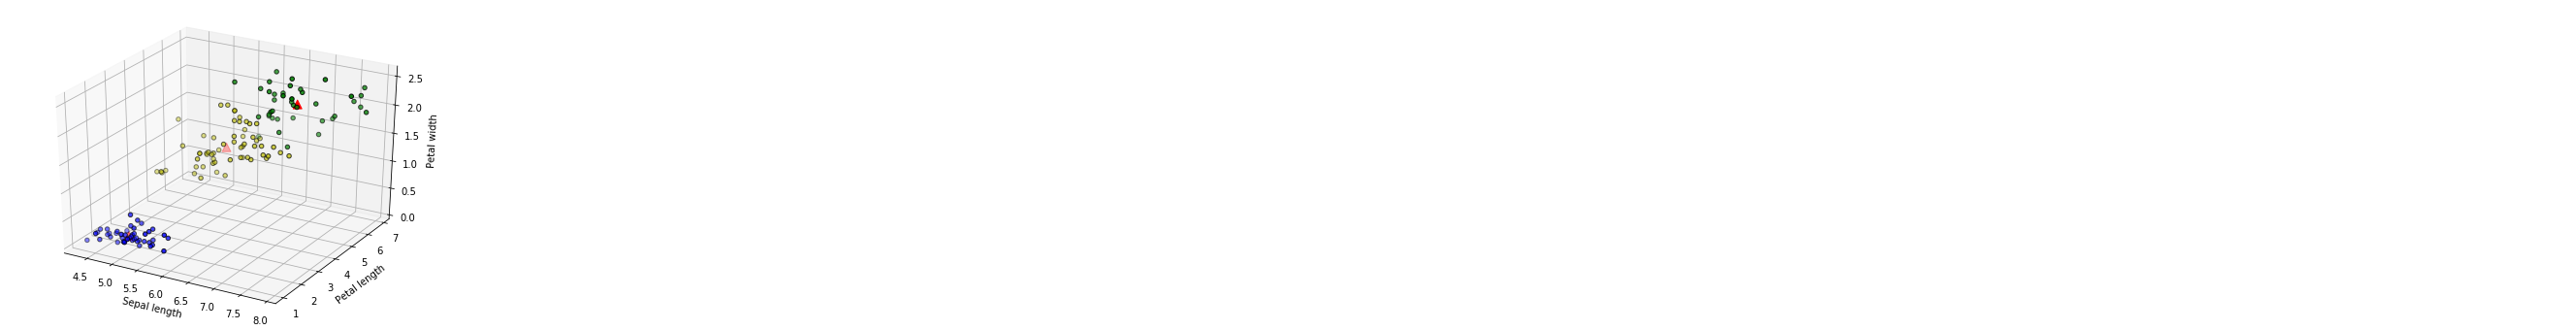

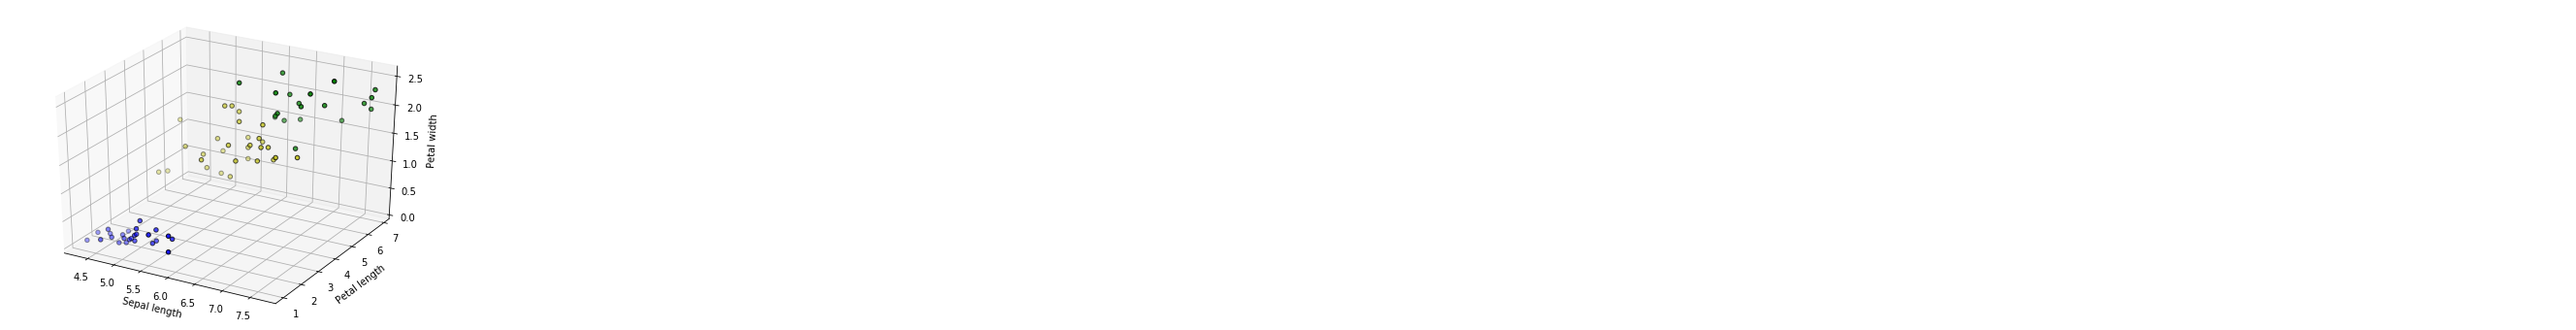

In [6]:
df = pd.read_csv('C:/Users/NewSense/Documents/Iris.csv')
X = np.column_stack((df['SepalLengthCm'], df['PetalLengthCm'], df['PetalWidthCm']))

K = 3
k_means_result = k_means(X, K)

centroids = k_means_result[0]
cluster_assignments = k_means_result[1]

colors = ['y', 'g', 'b']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

fig = plt.figure("KMeans", figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], color = cluster_assignments, edgecolor = 'k')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c = 'r', marker = '^', s = 80)

plt.show()

rows = list(range(25, 50))
df = df.drop(df.index[rows])
rows = list(range(50, 75))
df = df.drop(df.index[rows])
rows = list(range(75, 100))
df = df.drop(df.index[rows])

X = np.column_stack((df['SepalLengthCm'], df['PetalLengthCm'], df['PetalWidthCm']))
cluster_assignments = predict(X, centroids)

colors = ['y', 'g', 'b']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

fig = plt.figure("KMeans", figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], color = cluster_assignments, edgecolor = 'k')

ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

plt.show()